In [291]:
#!/usr/bin/env python

#Safir Mikhail 18.02.2021 

import os
import json
import random
import time
import numpy
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [300]:
class Settings:
    devices = 10 # Number of devices in the simulation
    signal_per_device_gain = 150 
    signal_per_device_zone = 100
    end_x = 800
    end_y = 800
    
settings = Settings()

In [383]:
class Device:
    device_id = 0
    x = 0
    y = 0
    device_type = "mobile" #tower
    in_zone = False

In [427]:
class Draw:

    def draw_once(self, devices):
        plt.figure(figsize=(10, 10))
        fig = plt.gcf()
        ax = fig.gca()
        
        for i in range(0, len(devices)):
            ax.add_artist(plt.Circle((devices[i].x, devices[i].y), settings.signal_per_device_zone, color='r', fill=False))
            
        for i in range(0, len(devices)):
            plt.plot(devices[i].x, devices[i].y, 'o', color="blue")
            plt.text(devices[i].x, devices[i].y+25, str(devices[i].device_id), fontdict=None, horizontalalignment='center', verticalalignment='center')

        plt.plot(0, 0, 'o')
        plt.plot(1000, 1000, 'o')
        
        plt.title("Routing")
        plt.grid(False)
        plt.show();

    
    def draw(self, points):
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 10))
        
        
        fig = plt.gcf()
        ax = fig.gca()
        
        for i in range(0, len(points[0])):
            ax.add_artist(plt.Circle((points[0][i], points[1][i]), settings.signal_per_device_zone, color='r', fill=False))

        plt.plot(points[0], points[1], 'o')
        plt.plot(0, 0, 'o')
        plt.plot(1000, 1000, 'o')
        
        plt.title("Routing")
        plt.grid(False)
        plt.show();

In [428]:
class Generator:
    
    def collision(self, devices):
        for i in range(0, len(devices)):
            device_current = devices[i]
            for j in range(0, len(devices)):
                device_to_reach = devices[j]
                if (device_current == device_to_reach):
                    continue;
                distance = math.sqrt( ((int(device_current.x)-int(device_to_reach.x))**2)+((int(device_current.y)-int(device_to_reach.y))**2) )
                    
                if (distance < (settings.signal_per_device_zone * 2)):
                    print("device " + str(device_current.device_id) + " reached " + str(device_to_reach.device_id) + " with dis " + str(distance))
    
    def walk(self, points):
        start_points_x = []
        start_points_y = []
        for i in range(0, len(points[0])):
            now_x = points[0][i]
            now_y = points[1][i]
            x, y = random.randint(-3, 3), random.randint(-3, 3)
            now_x += x
            now_y += y
            start_points_x.append(now_x)
            start_points_y.append(now_y)
        return [start_points_x, start_points_y]
            
    
    def start(self):
        devices = [] #Device array with classes
        
        for i in range(0, settings.devices):
            x, y = random.randint(100, settings.end_x),  random.randint(100, settings.end_y)
            
            device = Device()
            device.device_id = i
            device.x = x
            device.y = y
            
            devices.append(device)
            
        return devices
        pass

In [429]:
class Router:
    
    generator = Generator()
    draw = Draw()
    devices = []
    
    def build(self):
        plt.ion()
        devices = self.generator.start()
        self.draw.draw_once(devices)
        self.generator.collision(devices)
#         while True:
#             points = self.generator.walk(points)
#             self.draw.draw(points)
#             plt.pause(0.5)
        pass
    
    def start(self):
        self.build()
        pass

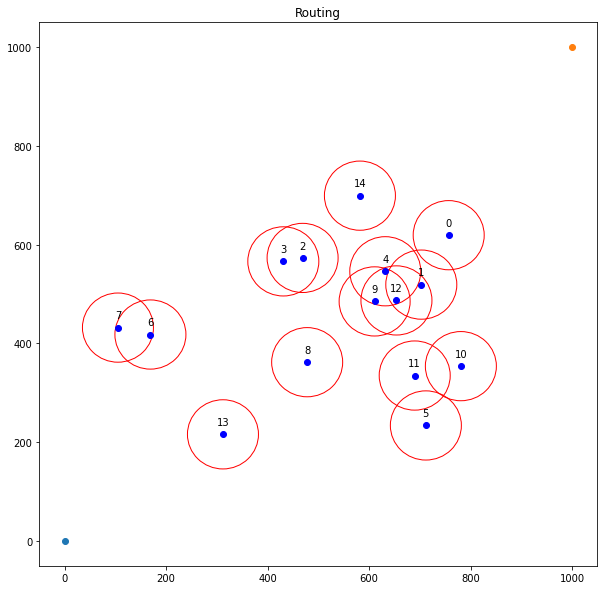

device 0 reached 1 with dis 113.64858116140297
device 1 reached 0 with dis 113.64858116140297
device 1 reached 4 with dis 75.96051605933177
device 1 reached 9 with dis 98.08159868191383
device 1 reached 12 with dis 58.52349955359813
device 2 reached 3 with dis 38.63935817272331
device 3 reached 2 with dis 38.63935817272331
device 4 reached 1 with dis 75.96051605933177
device 4 reached 9 with dis 64.51356446515724
device 4 reached 12 with dis 62.96824596572466
device 5 reached 10 with dis 138.42326394071193
device 5 reached 11 with dis 103.36827366266692
device 6 reached 7 with dis 65.5133574166368
device 7 reached 6 with dis 65.5133574166368
device 9 reached 1 with dis 98.08159868191383
device 9 reached 4 with dis 64.51356446515724
device 9 reached 12 with dis 43.04648650006177
device 10 reached 5 with dis 138.42326394071193
device 10 reached 11 with dis 92.9623579735368
device 11 reached 5 with dis 103.36827366266692
device 11 reached 10 with dis 92.9623579735368
device 12 reached 1 w

In [433]:
router = Router() # call public class
settings.devices = 15
settings.signal_per_device_zone = 70
router.start()

In [431]:
import numpy as np
from scipy.spatial.distance import cdist

x = np.array([[2,1]])
y = np.array([[10,5], [13,2], [60,60]])

d = cdist(x,y)

print(d[0][1])

11.045361017187261
